<a href="https://colab.research.google.com/github/oliviasteeed/Computer-Vision-Project/blob/main/Computer_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Project: Handwriting to typed text
This project identifies and types out written words from images. It uses object detection to find where text is in an image, and then classification to identify the word.

### Stage 1: Set up ultralytics and import stuff

In [1]:
!pip3 install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/107.7 GB disk)


In [1]:
import cv2
import matplotlib.pyplot as plt
import random as random
import os

### Stage 2: Initial segmentation model

Ultralytics 8.3.17 🚀 Python-3.12.6 torch-2.2.2 CPU (Intel Core(TM) i5-5257U 2.70GHz)
YOLOv8s-seg summary (fused): 195 layers, 11,810,560 parameters, 0 gradients, 42.6 GFLOPs

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /Users/oliviasteed/zidane.jpg: 384x640 2 persons, 2 ties, 517.0ms
Speed: 4.1ms preprocess, 517.0ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


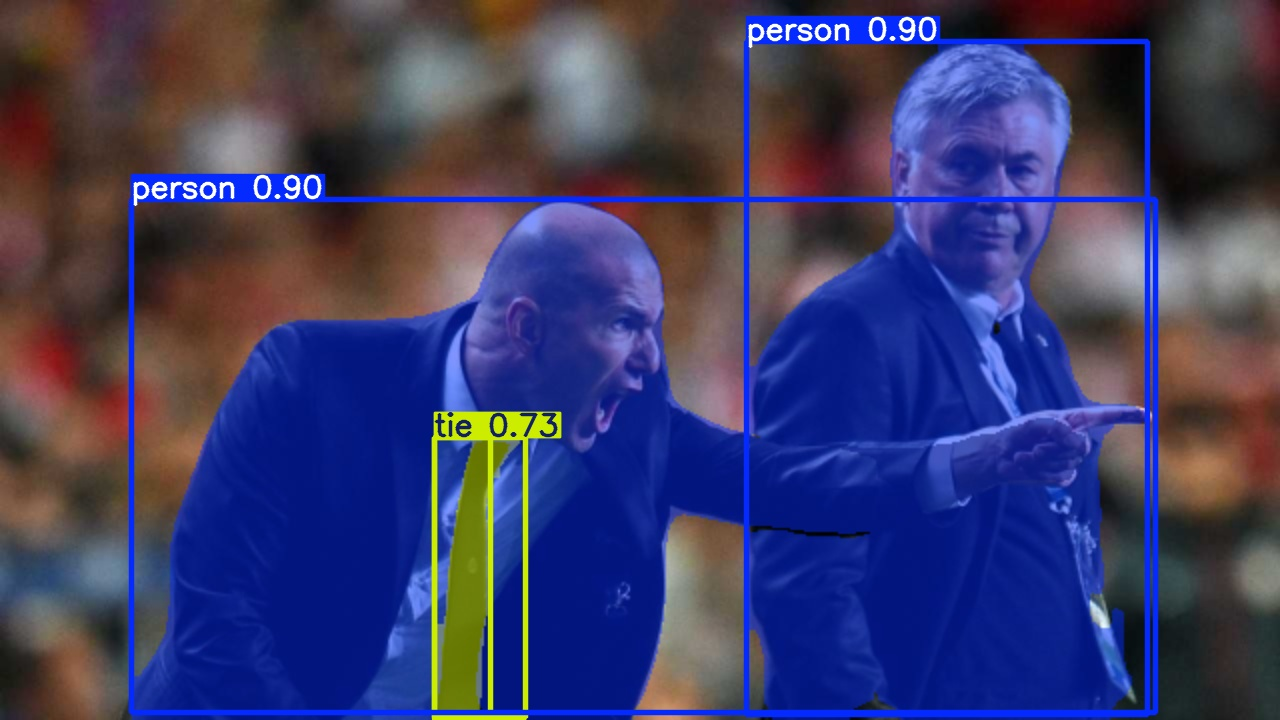

In [ ]:
# run segmentation model
# !yolo segment predict  model=yolov8s-seg.pt source='https://ultralytics.com/images/zidane.jpg'

# show resulting image
# %matplotlib inline
# from PIL import Image

# Image.open('/Users/oliviasteed/runs/segment/predict/zidane.jpg')


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /Users/oliviasteed/zidane.jpg: 384x640 2 persons, 1 tie, 231.1ms
Speed: 3.6ms preprocess, 231.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


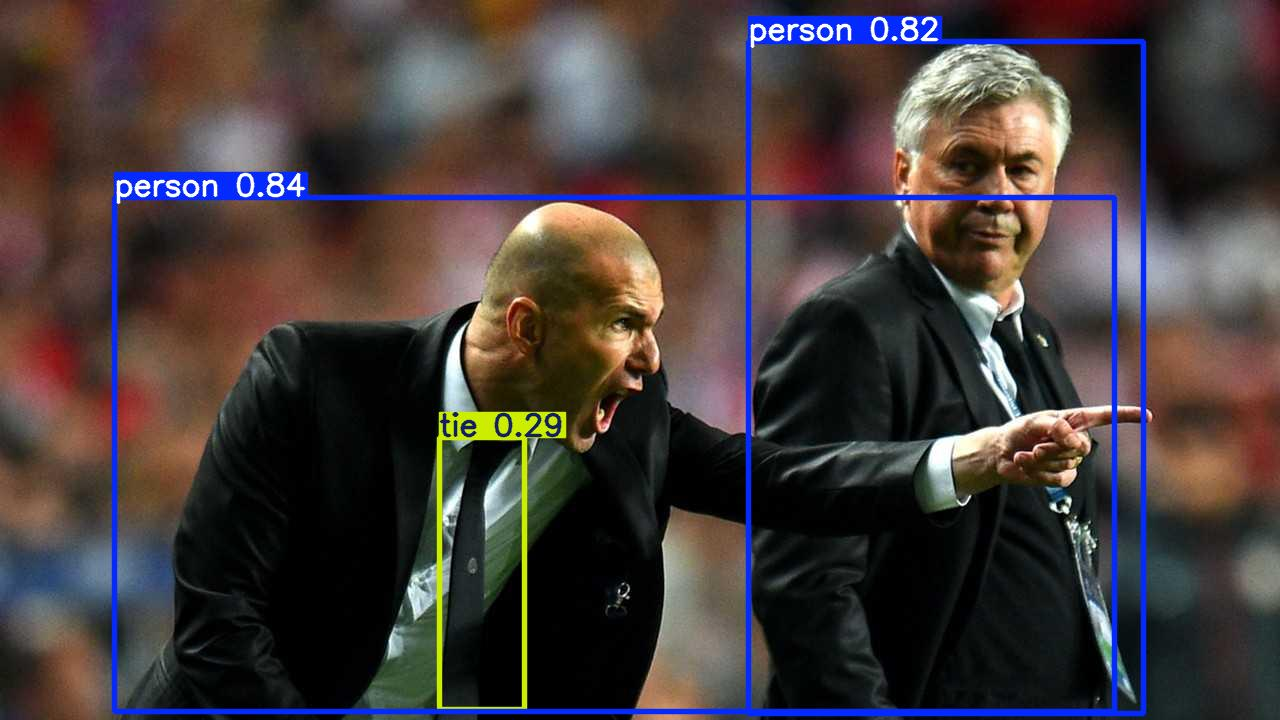

In [ ]:
# using out of the box model

# %matplotlib inline
# from PIL import Image

# from ultralytics import YOLO

# # Load a pretrained YOLOv8n model
# model = YOLO('yolov8n.pt')

# # Run inference on image
# results = model('https://ultralytics.com/images/zidane.jpg')
# # you can give it a list of images

# # Show the results
# for r in results:
#     im_array = r.plot()  # plot a BGR numpy array of predictions
#     im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
#     im.save('results.jpg')  # save image


# #show saved image
# Image.open('results.jpg')

In [10]:
# doing my own transfer learning with text data and my own added data

from ultralytics import YOLO

# make new model to train and load in weights from existing YOLO detection model
model1 = YOLO("yolov8n.yaml").load("yolov8n.pt")

# Train the model with text object detection data
results = model1.train(data="/Users/oliviasteed/Desktop/iat 360/cv/yolofindtext/data.yaml", epochs=1, imgsz=640)

# what needs to be done:

# pick dataset to transfer learn on
# download and clean
# add my own 30 datas

# make data yaml
# set up folder structure
# make sure img and txt file for each - convert from CSV

# train on added data

# validate on added data

# test on added data






Transferred 355/355 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.21 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.17 🚀 Python-3.12.6 torch-2.2.2 CPU (Intel Core(TM) i5-5257U 2.70GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/Users/oliviasteed/Desktop/iat 360/cv/yolofindtext/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fa

train: Scanning /Users/oliviasteed/Desktop/iat 360/cv/yolofindtext/train/labels.
val: Scanning /Users/oliviasteed/Desktop/iat 360/cv/yolofindtext/valid/labels.ca


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train7
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.934      2.731      1.403         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         61        241     0.0131      0.992      0.675      0.311

1 epochs completed in 0.088 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.2MB

Validating runs/detect/train7/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.17 🚀 Python-3.12.6 torch-2.2.2 CPU (Intel Core(TM) i5-5257U 2.70GHz)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         61        241     0.0131      0.992      0.677      0.312
Speed: 6.8ms preprocess, 288.7ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to runs/detect/train7


In [20]:
# add more data?

results = model1.train(data="/Users/oliviasteed/Desktop/iat 360/cv/textdetection/data.yaml", epochs=1, imgsz=416)

New https://pypi.org/project/ultralytics/8.3.21 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.17 🚀 Python-3.12.6 torch-2.2.2 CPU (Intel Core(TM) i5-5257U 2.70GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/Users/oliviasteed/Desktop/iat 360/cv/textdetection/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train742, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

train: Scanning /Users/oliviasteed/Desktop/iat 360/cv/textdetection/train/labels
val: Scanning /Users/oliviasteed/Desktop/iat 360/cv/textdetection/valid/labels.c


Plotting labels to runs/detect/train742/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train742
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G       2.25      2.195      2.127         18        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         80         93      0.476      0.118      0.207     0.0559

1 epochs completed in 0.042 hours.
Optimizer stripped from runs/detect/train742/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train742/weights/best.pt, 6.2MB

Validating runs/detect/train742/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.17 🚀 Python-3.12.6 torch-2.2.2 CPU (Intel Core(TM) i5-5257U 2.70GHz)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         80         93       0.48      0.118      0.207     0.0564
Speed: 3.5ms preprocess, 152.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train742


In [ ]:
# not sure what these mean
print(results)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x15002d5e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

### Stage 3: Validate

In [21]:
# validate model on validation data

metrics = model1.val()
print(metrics)

WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.17 🚀 Python-3.12.6 torch-2.2.2 CPU (Intel Core(TM) i5-5257U 2.70GHz)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/oliviasteed/Desktop/iat 360/cv/textdetection/valid/labels.c
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         80         93       0.48      0.118      0.207     0.0564
Speed: 4.2ms preprocess, 125.5ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train7422
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x15d316120>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0

In [25]:
# test on specific image

model1("/Users/oliviasteed/Desktop/iat 360/cv/yolofindtext/valid/images/8_png.rf.e8523a7d7dd2c83151fd22a9fcaeeea6.jpg")

# why no detections?



image 1/1 /Users/oliviasteed/Desktop/iat 360/cv/yolofindtext/valid/images/8_png.rf.e8523a7d7dd2c83151fd22a9fcaeeea6.jpg: 416x416 (no detections), 509.2ms
Speed: 7.8ms preprocess, 509.2ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Text'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 


image 1/1 /Users/oliviasteed/Desktop/iat 360/cv/yolofindtext/valid/images/8_png.rf.e8523a7d7dd2c83151fd22a9fcaeeea6.jpg: 416x416 (no detections), 657.1ms
Speed: 7.1ms preprocess, 657.1ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)


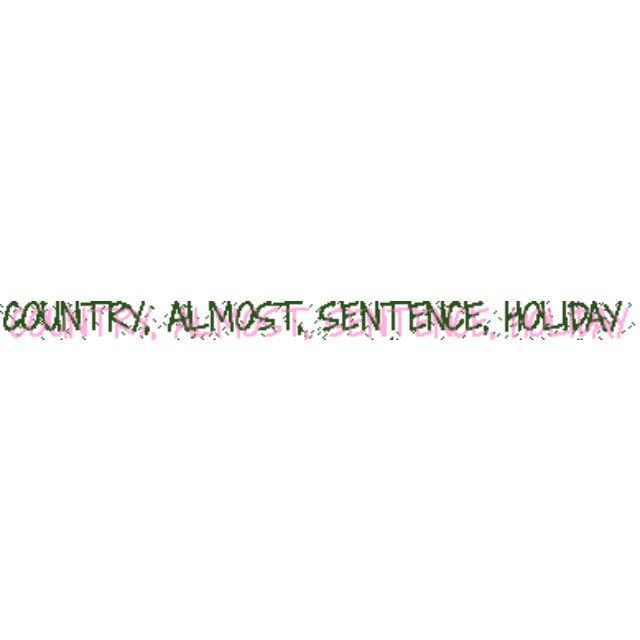

In [26]:
# show validation image - how to add bounding box?

%matplotlib inline
from PIL import Image

results = model1("/Users/oliviasteed/Desktop/iat 360/cv/yolofindtext/valid/images/8_png.rf.e8523a7d7dd2c83151fd22a9fcaeeea6.jpg")
# # you can give it a list of images

# # Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.save('results.jpg')  # save image


# #show saved image
Image.open('results.jpg')

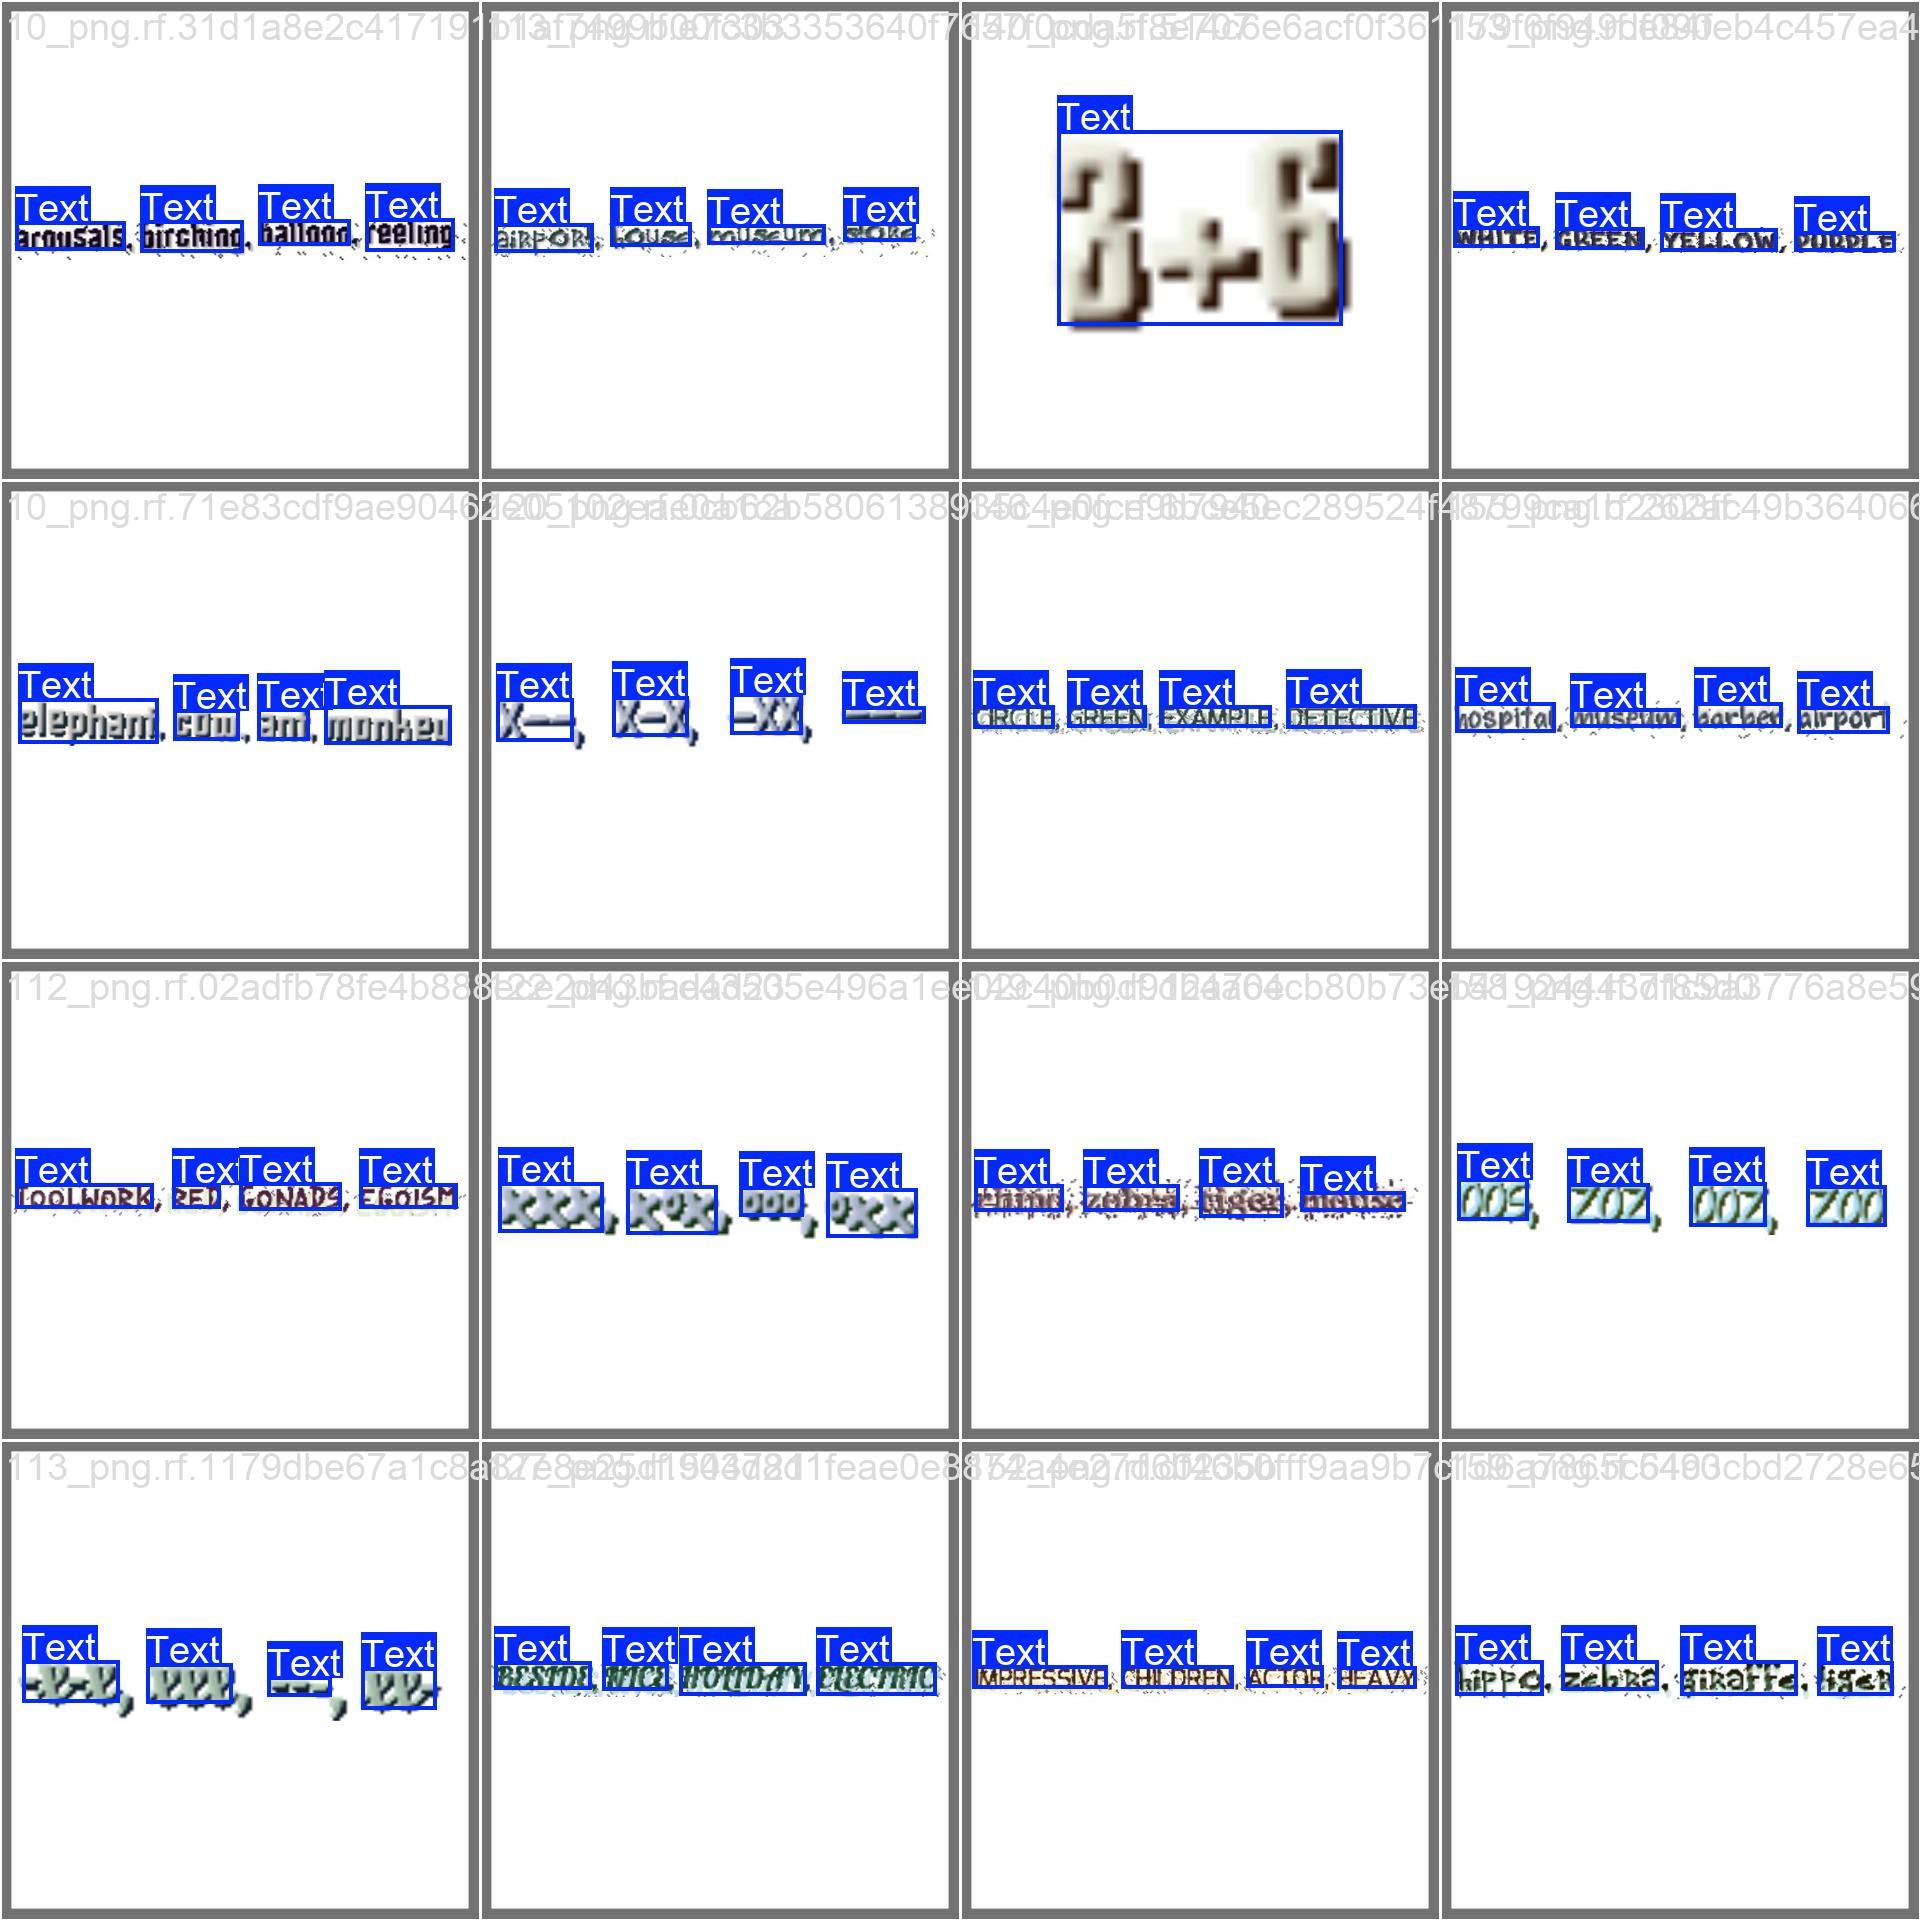

In [24]:
# show validation tests

%matplotlib inline
from PIL import Image

# Image.open('/Users/oliviasteed/runs/detect/train24/val_batch0_labels.jpg')
# Image.open('/Users/oliviasteed/runs/detect/train24/val_batch1_labels.jpg')
Image.open('/Users/oliviasteed/runs/detect/train2/val_batch2_labels.jpg')

## Test

In [ ]:
# how do i test??